In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
pd.set_option('mode.chained_assignment', None)

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

### Ler um csv (dataframe)

In [2]:
dados = pd.read_excel('imrs-resumido-2016.xlsx', index_col='mun')

In [3]:
dados.head()

,ibge7,popul,rdpc_formal,tx_mort,prop_priv_saude
mun,,,,,
Abadia dos Dourados,3100104,7037,540.70,4.55,15.32
Abaeté,3100203,23574,258.94,6.32,14.01
Abre Campo,3100302,13726,152.43,7.07,4.26
Acaiaca,3100401,4061,132.16,5.17,6.06
Açucena,3100500,10066,59.31,7.45,9.40


In [4]:
# dados2: incluir código para usar depois
dados2 = dados
# resultado2 = resultado.reset_index()
cod = pd.read_csv('codigos-mun.csv')
cod = cod[['mun', 'nome_mun', 'nome_meso']]
cod.rename(columns={'mun': 'ibge7'}, inplace=True)
dados2 = dados2.merge(cod)

In [5]:
dados2.head()

,ibge7,popul,rdpc_formal,tx_mort,prop_priv_saude,nome_mun,nome_meso
0,3100104,7037,540.70,4.55,15.32,Abadia dos Dourados,Triângulo Mineiro/Alto Paranaíba
1,3100203,23574,258.94,6.32,14.01,Abaeté,Central Mineira
2,3100302,13726,152.43,7.07,4.26,Abre Campo,Zona da Mata
3,3100401,4061,132.16,5.17,6.06,Acaiaca,Zona da Mata
4,3100500,10066,59.31,7.45,9.40,Açucena,Vale do Rio Doce


In [6]:
# verificar se tem algum valor faltante
dados.isnull().any()

ibge7              False
popul              False
rdpc_formal        False
tx_mort            False
prop_priv_saude    False
dtype: bool

In [7]:
# ver índices dos valores faltantes do dataframe
# faltantes = np.where(pd.isnull(dados['tx_anlf']))
# faltantes

# ver nome do index dos valores faltantes
# dados.index[faltantes].tolist()

# substituir o valor faltante pela média dos outros
# media = dados[pd.notnull(dados['tx_anlf'])].tx_anlf.mean()
# dados['tx_anlf'].fillna(media, inplace=True)

### Atenção!

As variáveis de interesse para 'dados' são as de posição 1 até 5, alterem para as de vocês.

In [99]:
dados.iloc[:,1:6].describe()

,popul,rdpc_formal,tx_mort,prop_priv_saude
count,8.530000e+02,853.000000,853.000000,853.000000
mean,2.461613e+04,224.721923,6.817280,10.074572
std,1.000713e+05,229.002939,1.633406,10.319930
min,8.150000e+02,21.400000,1.450000,0.080000
25%,4.940000e+03,104.560000,5.750000,2.660000
50%,8.283000e+03,169.790000,6.750000,6.220000
75%,1.803600e+04,262.320000,7.740000,14.260000
max,2.513451e+06,3296.670000,16.520000,68.290000


In [100]:
# médias
dados.iloc[:,1:6].mean()

popul              24616.131301
rdpc_formal          224.721923
tx_mort                6.817280
prop_priv_saude       10.074572
dtype: float64

In [10]:
dados.iloc[:,1:6].cov()

,popul,rdpc_formal,tx_mort,prop_priv_saude
popul,1.001427e+10,7.185591e+06,-9804.940018,352040.644352
rdpc_formal,7.185591e+06,5.244235e+04,-20.524976,1367.664141
tx_mort,-9.804940e+03,-2.052498e+01,2.668014,-0.237378
prop_priv_saude,3.520406e+05,1.367664e+03,-0.237378,106.500946


In [11]:
dados.iloc[:,1:6].corr()

,popul,rdpc_formal,tx_mort,prop_priv_saude
popul,1.000000,0.313554,-0.059985,0.340884
rdpc_formal,0.313554,1.000000,-0.054872,0.578711
tx_mort,-0.059985,-0.054872,1.000000,-0.014082
prop_priv_saude,0.340884,0.578711,-0.014082,1.000000


In [12]:
dados.columns

Index(['ibge7', 'popul', 'rdpc_formal', 'tx_mort', 'prop_priv_saude'], dtype='object')

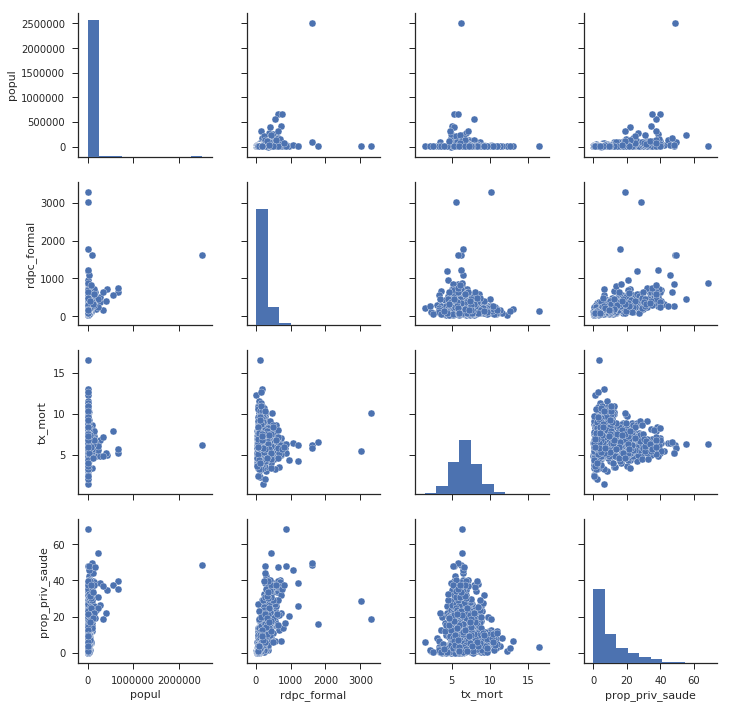

In [13]:
sns.set(style='ticks')
sns.pairplot(dados.iloc[:,1:11]);

### Normalidade multivariada

In [14]:
# subselecionar variáveis
X = dados.iloc[:,1:6]

In [15]:
# transformar em matriz (necessário para gerar o gráfico)
XX = X.values
# mudar o tipo dos dados
XX = np.asarray(XX, dtype=float)

In [16]:
n = XX.shape[0]
p = XX.shape[1]

In [17]:
# vetor de médias
Xb = np.mean(XX, axis=0)
print(Xb)

[  2.46161313e+04   2.24721923e+02   6.81728019e+00   1.00745721e+01]


In [18]:
# matriz de covariâncias
S = np.cov(XX.T)
print(S)

[[  1.00142742e+10   7.18559144e+06  -9.80494002e+03   3.52040644e+05]
 [  7.18559144e+06   5.24423462e+04  -2.05249756e+01   1.36766414e+03]
 [ -9.80494002e+03  -2.05249756e+01   2.66801372e+00  -2.37377808e-01]
 [  3.52040644e+05   1.36766414e+03  -2.37377808e-01   1.06500946e+02]]


In [19]:
# matriz de somas de quadrados e produtos
W = (n - 1) * S
print(W)

[[  8.53216160e+12   6.12212391e+09  -8.35380890e+06   2.99938629e+08]
 [  6.12212391e+09   4.46808790e+07  -1.74872792e+04   1.16524985e+06]
 [ -8.35380890e+06  -1.74872792e+04   2.27314769e+03  -2.02245893e+02]
 [  2.99938629e+08   1.16524985e+06  -2.02245893e+02   9.07388060e+04]]


In [20]:
# matriz de correlações
R = np.corrcoef(XX.T)
R

array([[ 1.        ,  0.31355355, -0.05998479,  0.34088378],
       [ 0.31355355,  1.        , -0.05487159,  0.57871091],
       [-0.05998479, -0.05487159,  1.        , -0.01408216],
       [ 0.34088378,  0.57871091, -0.01408216,  1.        ]])

### Função

In [21]:
# os dados devem estar no formato de matriz com apenas dados numéricos
def qq_multi(X):
    n = X.shape[0]
    p = X.shape[1]
    # vetor de médias
    Xb = np.mean(X, axis=0)
    S = np.cov(X.T)
    # inicializar o vetor de distâncias
    d = np.zeros(n)
    for i in range(n):
        di = (X[i] - Xb).T @ np.linalg.inv(S) @ (X[i] - Xb)
        d[i] = di
    dord = np.sort(d)
    # reta passando pela origem
    z = np.arange(0, dord.max(), 1)
    # inicializar o vetor de quantis
    q = np.zeros(n)
    for i in range(n):
        v = ((i + 1) - 0.5) / n
        vq = stats.chi2.ppf(v, p)
        q[i] = vq
    plt.scatter(dord, q, c='black')
    plt.plot(q, q, c='black')
    plt.xlim(dord.min() - 1, dord.max() + 1)
    plt.ylim(q.min() - 1, q.max() + 1)
    plt.xlabel('distâncias ordenadas')
    plt.ylabel(r'quantis da $\chi^2_{p}$');
    dados = {'distancias': dord, 'quantis_esperados': q}
    qq = pd.DataFrame(dados)
    # return(qq)

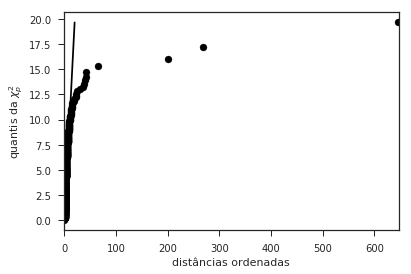

In [22]:
qq_multi(XX)

### ACP

In [23]:
# ACP
pca = PCA() 
resultado_pca = pca.fit_transform(scale(X))   # scale(X) padroniza os dados, como se usássemos a matriz R

In [24]:
resultado = pd.DataFrame({'cp1':resultado_pca[:, 0], 'cp2':resultado_pca[:, 1]}, index=dados.index)

In [25]:
# coeficientes dos CPs (autovetores)
# cada linha é um CP
print(pca.components_)

[[ 0.48493896  0.61202337 -0.08485521  0.61891938]
 [-0.05430099  0.05573001  0.98934188  0.12307807]
 [ 0.87118714 -0.38007152  0.10558684 -0.29228417]
 [ 0.05402394  0.69127939  0.05341962 -0.71858232]]


In [26]:
# variâncias dos CPs (autovalores)
pca.explained_variance_

array([ 1.84344578,  0.9996214 ,  0.74243991,  0.41918775])

In [27]:
# variância explicada acumulada
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([  46.03,   70.99,   89.53,  100.  ])

In [28]:
dados.columns

Index(['ibge7', 'popul', 'rdpc_formal', 'tx_mort', 'prop_priv_saude'], dtype='object')

In [29]:
# os três primeiros CPs
print(pca.components_[0:3, :])

[[ 0.48493896  0.61202337 -0.08485521  0.61891938]
 [-0.05430099  0.05573001  0.98934188  0.12307807]
 [ 0.87118714 -0.38007152  0.10558684 -0.29228417]]


Interpretação:

- $Y_1$: quanto maior o escore positivo, maiores: tamanho da população, rendimento do setor formal e % de planos de saúde.
- $Y_2$: mais influenciado pela taxa de mortalidade. Quanto maior o escore positivo, maior a taxa de mortalidade. 

In [30]:
# escores dos dois primeiros CPs
resultado

,cp1,cp2
mun,,
Abadia dos Dourados,1.192351,-1.225000
Abaeté,0.348458,-0.245515
Abre Campo,-0.608181,0.072083
Acaiaca,-0.502471,-1.057617
Açucena,-0.586251,0.343030
Água Boa,-0.807500,-1.759757
Água Comprida,0.382599,0.938497
Aguanil,-0.204900,0.403619
Águas Formosas,-0.586063,0.578343


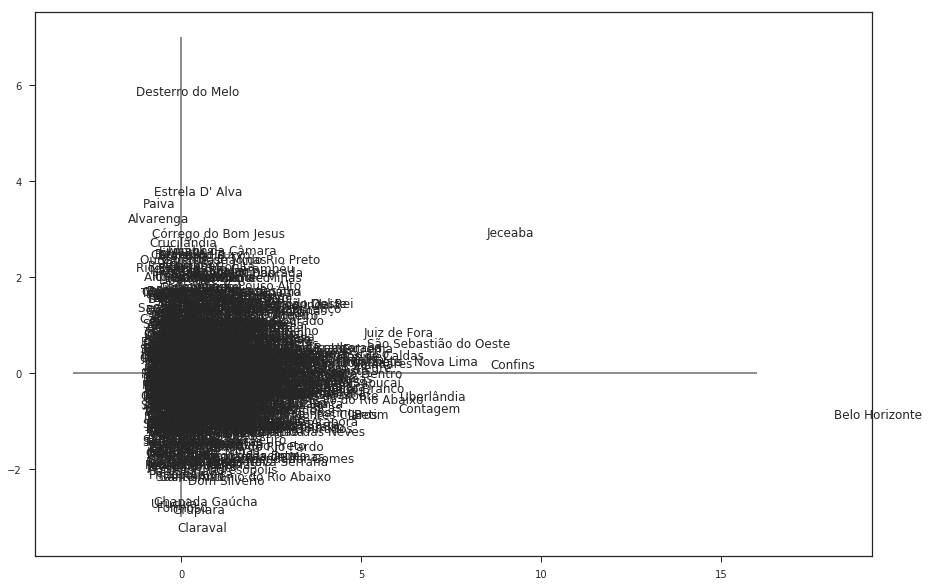

In [31]:
# diagrama de dispersão com os nomes das cidades
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
ax.scatter(resultado.cp1, resultado.cp2, s=0)
for i, txt in enumerate(resultado.index):
    ax.annotate(txt, (resultado.cp1[i], resultado.cp2[i]))
plt.hlines(0, -3, 16, color='gray')
plt.vlines(0, -3, 7, color='gray');

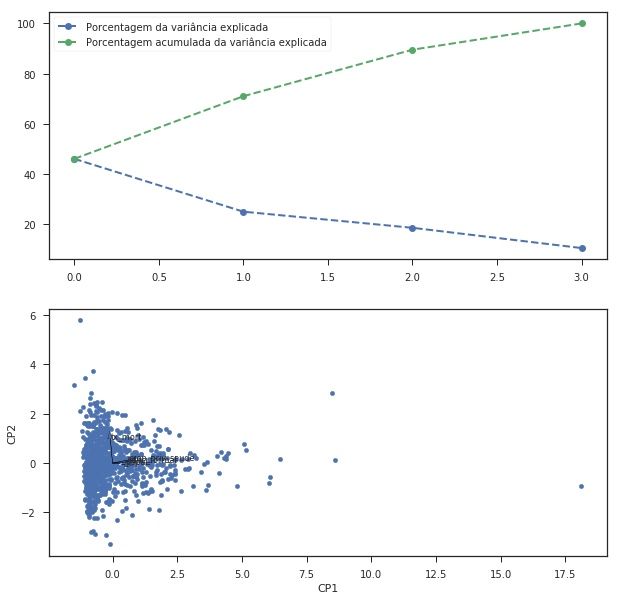

In [32]:
# scree plot e correlações CPs x variáveis
def get_angle(v1, v2):
    # calcula ângulo entre dois vetores
    cosang = np.dot(v1, v2)
    sinang = np.linalg.norm(np.cross(v1, v2))
    return np.degrees(np.arctan2(sinang, cosang))

def annotate_embedding(loadings, pc_x, pc_y, ax, scaling=10, n_features=10, angle_thr=20):
    # função para adicionar loadings no gráfico
    loadings['VectorLength'] = np.sqrt(loadings[pc_x]**2 + loadings[pc_y]**2)
    loadings = loadings.sort_values(by='VectorLength', ascending=False)
    
    # plota cada um dos maiores vetores 
    for feature, row in loadings.iloc[0:n_features].iterrows():
        vector = np.array([row[pc_x]*scaling, row[pc_y]*scaling])
        ax.arrow(0, 0, vector[0], vector[1], head_width=0.2, head_length=0.3)
        ax.annotate(feature, xy=(0, 0), xytext=(vector[0], vector[1]), fontsize=8)
    
    # retorna lista ordenada
    top_features = loadings.index.tolist()
    return top_features

# cria um dataframe com os resultados da ACP
pca_df = pd.DataFrame(
    resultado_pca,
    index=X.index,
    columns=['CP' + str(i + 1) for i in range(resultado_pca.shape[1])]
)

import itertools
# cria dois gráficos
_, axes = plt.subplots(nrows=2, figsize=(10,10))  # número de colunas e tamanho

# plota a variância explicada
axes[0].plot(
    pca.explained_variance_ratio_*100, "--o", linewidth=2,
    label='Porcentagem da variância explicada'
)

# plota a variância explicada acumulada
axes[0].plot(
    (pca.explained_variance_ratio_ * 100).cumsum(), "--o", linewidth=2,
    label='Porcentagem acumulada da variância explicada'
)

# mostra legenda
axes[0].legend(loc='best', frameon=True)
    
# loadings de cada componente
loadings = pd.DataFrame(
    pca.components_,
    index=['CP'+str(i+1) for i in range(len(pca.components_))],
    columns=X.columns
).T

# plota os componentes
i = 1
x, y = 'CP'+str(i), 'CP'+str(i+1)
# plotar
settings = {'kind': 'scatter', 'ax': axes[i], 'alpha': 1, 'x': x, 'y': y}
pca_df.plot(label=None, **settings)
# mostrar os loadings (correlações)
annotate_embedding(loadings, x, y, axes[i], scaling=1, n_features=20, angle_thr=20)
    
# faz aparecer o gráfico
plt.show();

## Selecionar componentes principais

In [33]:
# teste dos coeficientes dos autovetores
for ei in pca.components_:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ei))
print('ok!')

ok!


In [34]:
# lista com autovalores e autovetores
eig_pairs = [(np.abs(pca.explained_variance_[i]), pca.components_[:,i]) for i in range(len(pca.components_))]

# ordenar em ordem decrescente
eig_pairs.sort()
eig_pairs.reverse()

# visualizar autovalores
print('Autovalores em ordem decrescente:')
for i in eig_pairs:
    print(i[0])

Autovalores em ordem decrescente:
1.84344578362
0.999621397278
0.742439905459
0.419187749325


In [35]:
# variãncia explicada acumulada
tot = sum(pca.explained_variance_)
var_exp = [(i / tot)*100 for i in sorted(pca.explained_variance_, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([ 46.03211628,  70.99335399,  89.53259196, 100.        ])

In [36]:
# número de CPs gerados (k = p)
cp =['CP'+str(i+1) for i in range(len(pca.components_))]
cp

['CP1', 'CP2', 'CP3', 'CP4']

In [37]:
df = pd.DataFrame({'cp': cp, 'var_exp': var_exp, 'cum_var_exp': cum_var_exp})
df

,cp,var_exp,cum_var_exp
0,CP1,46.032116,46.032116
1,CP2,24.961238,70.993354
2,CP3,18.539238,89.532592
3,CP4,10.467408,100.000000


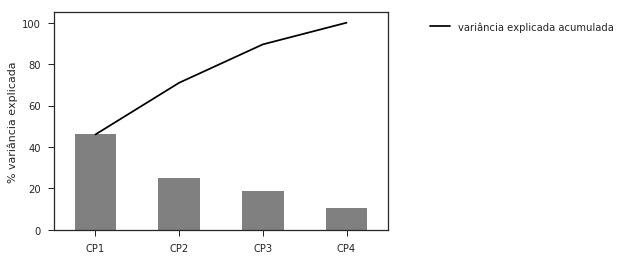

In [38]:
# scree plot
fig, ax = plt.subplots()
df.plot.bar('cp', 'var_exp', color='gray', ax=ax, legend=False)
df.plot.line('cp', 'cum_var_exp', color='black', ax=ax)
plt.legend(labels=['variância explicada acumulada'],
           loc='upper right', 
           bbox_to_anchor=(1.7, 1))
plt.ylabel('% variância explicada')
plt.xlabel('');

Os dois primeiros CPs explicam 71% da variação. Sendo assim, eles são suficientes.

### Adicional: incluir a informação da mesorregião

In [39]:
# novo dataframe com os resultados da ACP
resultado2 = resultado

In [40]:
# no dataframe resultado2 incluir os códigos
resultado2['ibge7'] = dados['ibge7'].values

In [41]:
resultado2.head()

,cp1,cp2,ibge7
mun,,,
Abadia dos Dourados,1.192351,-1.225000,3100104
Abaeté,0.348458,-0.245515,3100203
Abre Campo,-0.608181,0.072083,3100302
Acaiaca,-0.502471,-1.057617,3100401
Açucena,-0.586251,0.343030,3100500


In [42]:
resultado2 = resultado.reset_index()
cod = pd.read_csv('/home/patricia/drive/nupis/dados/codigos-mun.csv')
cod = cod[['mun', 'nome_meso']]   # incluí o nome do município e o nome da mesorregião, mas poderia 
                                  # ter incluído o nome da microrregião também
cod.rename(columns={'mun': 'ibge7'}, inplace=True)

In [43]:
# mesclar o dataframe resultado2 com o dataframe 'cod' para incluir nome da mesorregião
resultado2 = resultado2.merge(cod)

In [44]:
resultado2.head()

,mun,cp1,cp2,ibge7,nome_meso
0,Abadia dos Dourados,1.192351,-1.225000,3100104,Triângulo Mineiro/Alto Paranaíba
1,Abaeté,0.348458,-0.245515,3100203,Central Mineira
2,Abre Campo,-0.608181,0.072083,3100302,Zona da Mata
3,Acaiaca,-0.502471,-1.057617,3100401,Zona da Mata
4,Açucena,-0.586251,0.343030,3100500,Vale do Rio Doce


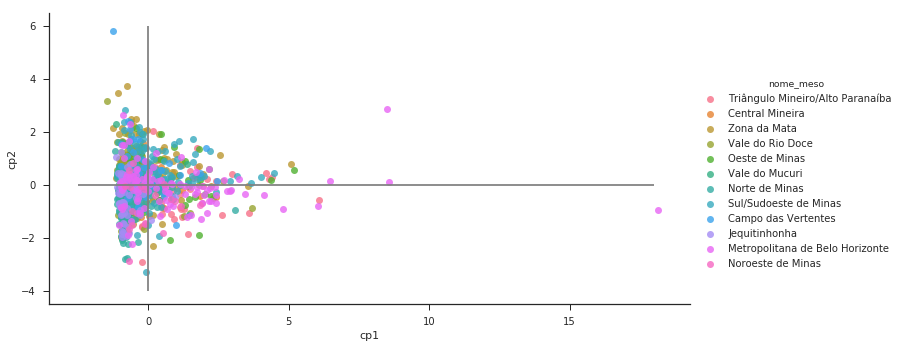

In [45]:
# diagrama de dispersão sem os nomes dos municípios
# as cores indicam as mesorregiões
sns.lmplot('cp1', 'cp2', hue='nome_meso', fit_reg=False, data=resultado2, aspect=2)
plt.hlines(0, -2.5, 18, color='gray')
plt.vlines(0, -4, 6, color='gray');

In [46]:
# pacote altair para fazer outros tipos de gráficos
# usaremos para o diagrama de dispersão com a cor de acordo com a mesorregião
import altair as alt
alt.renderers.enable('notebook');

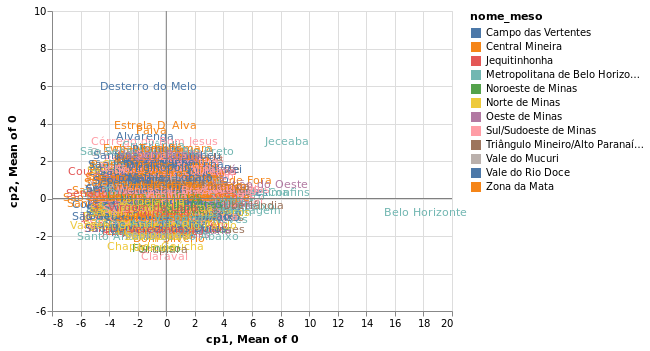

In [49]:
# gráfico
g = alt.Chart(resultado2).mark_text().encode(
    alt.X('cp1', scale=alt.Scale(domain=[-7, 20])),
    alt.Y('cp2', scale=alt.Scale(domain=[-5, 10])),
    text='mun',
    color='nome_meso'
)
# eixo x = 0
bar = alt.Chart(resultado2).mark_rule(color='gray').encode(
    x='mean(0):Q')
# eixo y = 0
bar1 = alt.Chart(resultado2).mark_rule(color='gray').encode(
    y='mean(0):Q')


g + bar + bar1

## Atenção!

A partir dessa célula eu realizo todas as análises novamente, porém selecionando os municípios de uma mesorregião de MG (eu escolhi a Sul/Sudoeste, mas qualquer outra poderia ter sido escolhida).

## Selecionando municípios apenas da mesorregião Sul/Sudoeste de MG

In [50]:
dados2.nome_meso.unique()

array(['Triângulo Mineiro/Alto Paranaíba', 'Central Mineira',
       'Zona da Mata', 'Vale do Rio Doce', 'Oeste de Minas',
       'Vale do Mucuri', 'Norte de Minas', 'Sul/Sudoeste de Minas',
       'Campo das Vertentes', 'Jequitinhonha',
       'Metropolitana de Belo Horizonte', 'Noroeste de Minas'], dtype=object)

In [51]:
meso = dados2.query('nome_meso == "Sul/Sudoeste de Minas"')
meso = meso.reset_index().drop('index', axis=1)

In [52]:
# definindo o index como sendo o nome do município
meso = meso.set_index('nome_mun')

In [53]:
meso.iloc[:,1:5].describe()

,popul,rdpc_formal,tx_mort,prop_priv_saude
count,146.000000,146.000000,146.000000,146.000000
mean,17823.095890,251.649315,7.263493,13.175822
std,25713.583314,139.213318,1.493421,9.671320
min,1703.000000,91.770000,1.450000,1.250000
25%,5402.750000,166.340000,6.492500,5.770000
50%,10287.000000,208.820000,7.035000,10.230000
75%,17737.250000,290.100000,8.047500,17.602500
max,164912.000000,1082.990000,11.560000,47.140000


In [54]:
# médias
meso.iloc[:,1:5].mean()

popul              17823.095890
rdpc_formal          251.649315
tx_mort                7.263493
prop_priv_saude       13.175822
dtype: float64

In [55]:
meso.iloc[:,1:5].cov()

,popul,rdpc_formal,tx_mort,prop_priv_saude
popul,6.611884e+08,2.251341e+06,-3560.395717,156892.585300
rdpc_formal,2.251341e+06,1.938035e+04,-34.830855,887.857738
tx_mort,-3.560396e+03,-3.483085e+01,2.230307,-0.016532
prop_priv_saude,1.568926e+05,8.878577e+02,-0.016532,93.534424


In [56]:
meso.iloc[:,1:5].corr()

,popul,rdpc_formal,tx_mort,prop_priv_saude
popul,1.000000,0.628924,-0.092716,0.630891
rdpc_formal,0.628924,1.000000,-0.167533,0.659442
tx_mort,-0.092716,-0.167533,1.000000,-0.001145
prop_priv_saude,0.630891,0.659442,-0.001145,1.000000


In [57]:
meso.columns

Index(['ibge7', 'popul', 'rdpc_formal', 'tx_mort', 'prop_priv_saude',
       'nome_meso'],
      dtype='object')

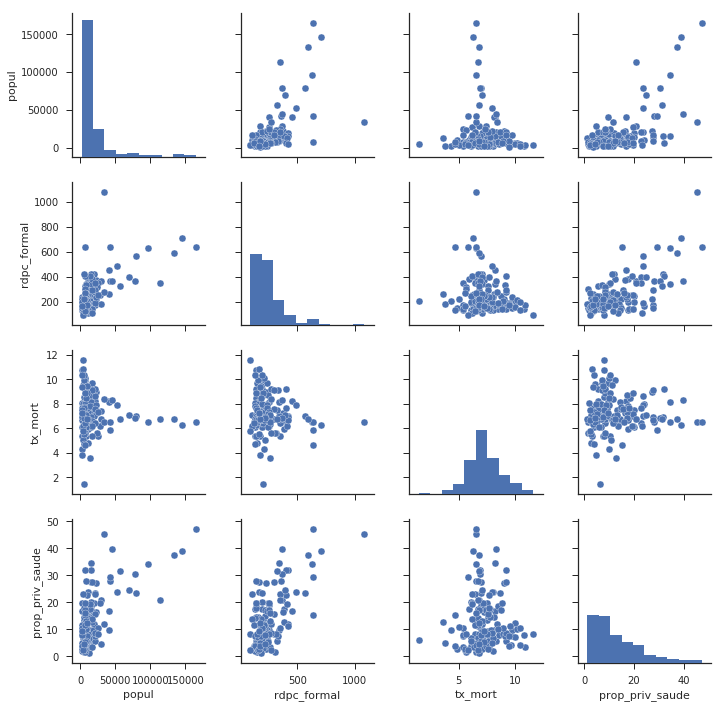

In [58]:
sns.set(style='ticks')
sns.pairplot(meso.iloc[:,1:5]);

### Normalidade multivariada

In [59]:
# subselecionar variáveis
X = meso.iloc[:,1:5]

In [60]:
# transformar em matriz (necessário para gerar o gráfico)
XX = X.values
# mudar o tipo dos dados
XX = np.asarray(XX, dtype=float)

In [61]:
n = XX.shape[0]
p = XX.shape[1]

In [62]:
# vetor de médias
Xb = np.mean(XX, axis=0)
print(Xb)

[  1.78230959e+04   2.51649315e+02   7.26349315e+00   1.31758219e+01]


In [63]:
# matriz de covariâncias
S = np.cov(XX.T)
print(S)

[[  6.61188367e+08   2.25134084e+06  -3.56039572e+03   1.56892585e+05]
 [  2.25134084e+06   1.93803478e+04  -3.48308548e+01   8.87857738e+02]
 [ -3.56039572e+03  -3.48308548e+01   2.23030702e+00  -1.65315116e-02]
 [  1.56892585e+05   8.87857738e+02  -1.65315116e-02   9.35344245e+01]]


In [64]:
# matriz de somas de quadrados e produtos
W = (n - 1) * S
print(W)

[[  9.58723132e+10   3.26444422e+08  -5.16257379e+05   2.27494249e+07]
 [  3.26444422e+08   2.81015043e+06  -5.05047395e+03   1.28739372e+05]
 [ -5.16257379e+05  -5.05047395e+03   3.23394518e+02  -2.39706918e+00]
 [  2.27494249e+07   1.28739372e+05  -2.39706918e+00   1.35624916e+04]]


In [65]:
# matriz de correlações
R = np.corrcoef(XX.T)
R

array([[ 1.        ,  0.62892356, -0.09271571,  0.63089063],
       [ 0.62892356,  1.        , -0.16753325,  0.65944239],
       [-0.09271571, -0.16753325,  1.        , -0.00114458],
       [ 0.63089063,  0.65944239, -0.00114458,  1.        ]])

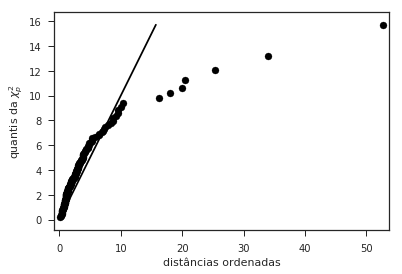

In [66]:
qq_multi(XX)

### Distâncias

In [67]:
from scipy.spatial.distance import squareform, pdist

In [68]:
D_e = squareform(pdist(X, metric='euclidean'))

In [69]:
# incluir nomes dos municípios nas distâncias - criar novo dataframe
Dedf = pd.DataFrame(D_e, index=meso.index, columns=meso.index)

In [70]:
Dedf

nome_mun,Aiuruoca,Alagoa,Albertina,Alfenas,Alpinópolis,Alterosa,Andradas,Andrelândia,Arantina,Arceburgo,...,Silvianópolis,Soledade de Minas,Tocos do Moji,Toledo,Três Corações,Três Pontas,Turvolândia,Varginha,Virgínia,Wenceslau Braz
nome_mun,,,,,,,,,,,,,,,,,,,,,
Aiuruoca,0.000000,3468.009941,3184.041814,72998.934828,13517.001001,8270.168981,34183.957428,6283.003060,3347.371121,4258.081879,...,105.057039,140.967034,2090.521435,78.017901,72250.212471,50655.178553,1229.267359,127160.613339,2644.078756,3608.094628
Alagoa,3468.009941,0.000000,284.774939,76466.922106,16985.001763,11738.092870,37651.911403,9751.000641,128.583900,7724.396695,...,3543.884974,3338.332851,1383.369957,3438.620225,75718.215896,54123.180553,2239.231617,130628.615084,6112.012992,141.309581
Albertina,3184.041814,284.774939,0.000000,76182.826246,16701.005394,11454.199195,37367.778970,9467.019495,175.278140,7439.981126,...,3259.525869,3054.747226,1102.248657,3155.172906,75434.170118,53839.132199,1955.040856,130344.554411,5828.093965,425.884812
Alfenas,72998.934828,76466.922106,76182.826246,0.000000,59482.138402,64729.376681,38815.166224,66716.047101,76346.149419,68744.243940,...,72923.602553,73129.213231,75087.483266,73029.329620,773.199816,22344.260689,74227.797031,54162.007398,70355.067673,76607.016805
Alpinópolis,13517.001001,16985.001763,16701.005394,59482.138402,0.000000,5247.280167,20667.566377,7234.002427,16864.077499,9264.845000,...,13442.191508,13647.110038,15605.346339,13547.196166,58733.256065,37138.236413,14746.020441,113643.680899,10873.018754,17125.020969
Alterosa,8270.168981,11738.092870,11454.199195,64729.376681,5247.280167,0.000000,25914.837410,1987.591381,11617.000771,4023.109173,...,8195.966759,8400.011875,10358.120355,8300.023699,63980.404356,42385.409741,9499.323335,118890.842333,5626.109451,11878.032208
Andradas,34183.957428,37651.911403,37367.778970,38815.166224,20667.566377,25914.837410,0.000000,27901.213507,37531.242389,29929.081145,...,34108.490760,34314.380916,36272.770600,34214.564346,38067.091371,16472.472053,35412.749499,92977.104740,31540.190947,37792.045857
Andrelândia,6283.003060,9751.000641,9467.019495,66716.047101,7234.002427,1987.591381,27901.213507,0.000000,9630.107394,2037.940224,...,6208.485086,6413.191992,8371.575683,6313.358523,65967.243675,44372.215876,7512.060157,120877.659226,3639.031591,9891.022817
Arantina,3347.371121,128.583900,175.278140,76346.149419,16864.077499,11617.000771,37531.242389,9630.107394,0.000000,7604.657834,...,3424.196010,3217.023183,1260.131779,3317.076963,75597.332203,54002.309957,2119.340641,130507.756109,5991.084214,262.145481


In [71]:
# retornar os dois municípios mais diferentes ou mais parecidos de acordo com as variáveis usadas
def compara_dist(df, op='max'):
    if op == 'max':
        maximo = np.amax(df.values)
        a = np.where(df.values == maximo)
    else:
        df = df[df > 0]
        minimo = np.nanmin(df.values)
        a = np.where(df.values == minimo)
    return [df.index[a[0][0]], df.index[a[0][1]]]

In [72]:
# mais parecidos
compara_dist(Dedf,'min')

['Jacuí', 'Serrania']

In [73]:
# mais diferentes
compara_dist(Dedf)

['Poços de Caldas', 'Senador José Bento']

### ACP

In [74]:
# ACP
pca = PCA() 
resultado_pca = pca.fit_transform(scale(X))   # scale(X) padroniza os dados, como se usássemos a matriz R

In [75]:
resultado = pd.DataFrame({'cp1':resultado_pca[:, 0], 'cp2':resultado_pca[:, 1]}, index=meso.index)

In [76]:
# coeficientes dos CPs (autovetores)
# cada linha é um CP
print(pca.components_)

[[ 0.56786572  0.58084767 -0.11610492  0.57154542]
 [-0.05600695  0.05094264 -0.97792024 -0.19478213]
 [-0.82013662  0.43391236 -0.00470523  0.37292607]
 [ 0.04204376  0.68683397  0.17369374 -0.70450117]]


In [77]:
# variâncias dos CPs (autovalores)
pca.explained_variance_

array([ 2.31307959,  1.01010788,  0.38246745,  0.32193128])

In [78]:
# variância explicada acumulada
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([  57.43,   82.51,   92.01,  100.  ])

In [79]:
meso.columns

Index(['ibge7', 'popul', 'rdpc_formal', 'tx_mort', 'prop_priv_saude',
       'nome_meso'],
      dtype='object')

In [80]:
# os três primeiros CPs
print(pca.components_[0:3, :])

[[ 0.56786572  0.58084767 -0.11610492  0.57154542]
 [-0.05600695  0.05094264 -0.97792024 -0.19478213]
 [-0.82013662  0.43391236 -0.00470523  0.37292607]]


Interpretação:

- $Y_1$: quanto maior o escore positivo, maiores: tamanho da população, rendimento do setor formal e % de planos de saúde.
- $Y_2$: mais influenciado pela taxa de mortalidade. Quanto maior o escore negativo, maior a taxa de mortalidade. 

In [81]:
# escores dos dois primeiros CPs
resultado.head()

,cp1,cp2
nome_mun,,
Aiuruoca,-1.199928,-1.378355
Alagoa,-0.850382,-0.146456
Albertina,-0.464758,2.044242
Alfenas,3.303670,-0.041023
Alpinópolis,-0.413506,0.622945


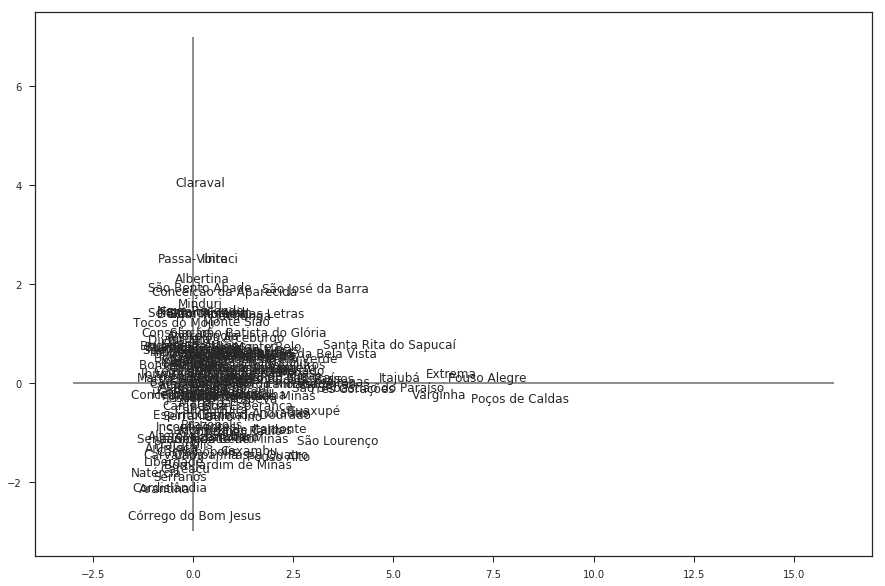

In [82]:
# diagrama de dispersão com os nomes das cidades
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
ax.scatter(resultado.cp1, resultado.cp2, s=0)
for i, txt in enumerate(resultado.index):
    ax.annotate(txt, (resultado.cp1[i], resultado.cp2[i]))
plt.hlines(0, -3, 16, color='gray')
plt.vlines(0, -3, 7, color='gray');

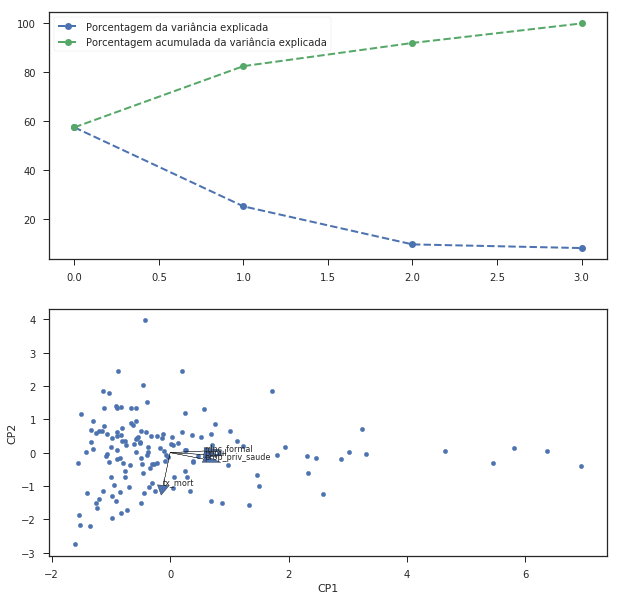

In [83]:
# scree plot e correlações CPs x variáveis
def get_angle(v1, v2):
    # calcula ângulo entre dois vetores
    cosang = np.dot(v1, v2)
    sinang = np.linalg.norm(np.cross(v1, v2))
    return np.degrees(np.arctan2(sinang, cosang))

def annotate_embedding(loadings, pc_x, pc_y, ax, scaling=10, n_features=10, angle_thr=20):
    # função para adicionar loadings no gráfico
    loadings['VectorLength'] = np.sqrt(loadings[pc_x]**2 + loadings[pc_y]**2)
    loadings = loadings.sort_values(by='VectorLength', ascending=False)
    
    # plota cada um dos maiores vetores 
    for feature, row in loadings.iloc[0:n_features].iterrows():
        vector = np.array([row[pc_x]*scaling, row[pc_y]*scaling])
        ax.arrow(0, 0, vector[0], vector[1], head_width=0.2, head_length=0.3)
        ax.annotate(feature, xy=(0, 0), xytext=(vector[0], vector[1]), fontsize=8)
    
    # retorna lista ordenada
    top_features = loadings.index.tolist()
    return top_features

# cria um dataframe com os resultados da ACP
pca_df = pd.DataFrame(
    resultado_pca,
    index=X.index,
    columns=['CP' + str(i + 1) for i in range(resultado_pca.shape[1])]
)

import itertools
# cria dois gráficos
_, axes = plt.subplots(nrows=2, figsize=(10,10))  # número de colunas e tamanho

# plota a variância explicada
axes[0].plot(
    pca.explained_variance_ratio_*100, "--o", linewidth=2,
    label='Porcentagem da variância explicada'
)

# plota a variância explicada acumulada
axes[0].plot(
    (pca.explained_variance_ratio_ * 100).cumsum(), "--o", linewidth=2,
    label='Porcentagem acumulada da variância explicada'
)

# mostra legenda
axes[0].legend(loc='best', frameon=True)
    
# loadings de cada componente
loadings = pd.DataFrame(
    pca.components_,
    index=['CP'+str(i+1) for i in range(len(pca.components_))],
    columns=X.columns
).T

# plota os componentes
i = 1
x, y = 'CP'+str(i), 'CP'+str(i+1)
# plotar
settings = {'kind': 'scatter', 'ax': axes[i], 'alpha': 1, 'x': x, 'y': y}
pca_df.plot(label=None, **settings)
# mostrar os loadings (correlações)
annotate_embedding(loadings, x, y, axes[i], scaling=1, n_features=20, angle_thr=20)
    
# faz aparecer o gráfico
plt.show();

## Selecionar componentes principais

In [84]:
# teste dos coeficientes dos autovetores
for ei in pca.components_:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ei))
print('ok!')

ok!


In [85]:
# lista com autovalores e autovetores
eig_pairs = [(np.abs(pca.explained_variance_[i]), pca.components_[:,i]) for i in range(len(pca.components_))]

# ordenar em ordem decrescente
eig_pairs.sort()
eig_pairs.reverse()

# visualizar autovalores
print('Autovalores em ordem decrescente:')
for i in eig_pairs:
    print(i[0])

Autovalores em ordem decrescente:
2.31307959435
1.01010788483
0.382467450374
0.321931277341


In [86]:
# variãncia explicada acumulada
tot = sum(pca.explained_variance_)
var_exp = [(i / tot)*100 for i in sorted(pca.explained_variance_, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([  57.43091459,   82.51064803,   92.00684329,  100.        ])

In [87]:
# número de CPs gerados (k = p)
cp =['CP'+str(i+1) for i in range(len(pca.components_))]
cp

['CP1', 'CP2', 'CP3', 'CP4']

In [88]:
df = pd.DataFrame({'cp': cp, 'var_exp': var_exp, 'cum_var_exp': cum_var_exp})
df

,cp,var_exp,cum_var_exp
0,CP1,57.430915,57.430915
1,CP2,25.079733,82.510648
2,CP3,9.496195,92.006843
3,CP4,7.993157,100.000000


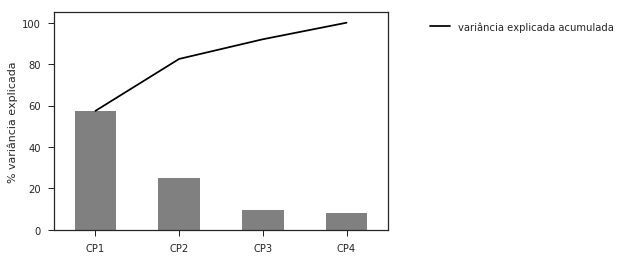

In [89]:
# scree plot
fig, ax = plt.subplots()
df.plot.bar('cp', 'var_exp', color='gray', ax=ax, legend=False)
df.plot.line('cp', 'cum_var_exp', color='black', ax=ax)
plt.legend(labels=['variância explicada acumulada'],
           loc='upper right', 
           bbox_to_anchor=(1.7, 1))
plt.ylabel('% variância explicada')
plt.xlabel('');

### Adicional: incluir a informação da microrregião

In [90]:
# no resultado2 incluir código
resultado2 = resultado

In [91]:
# no dataframe resultado2 incluir os códigos
resultado2['ibge7'] = meso['ibge7'].values

In [92]:
resultado2

,cp1,cp2,ibge7
nome_mun,,,
Aiuruoca,-1.199928,-1.378355,3101201
Alagoa,-0.850382,-0.146456,3101300
Albertina,-0.464758,2.044242,3101409
Alfenas,3.303670,-0.041023,3101607
Alpinópolis,-0.413506,0.622945,3101904
Alterosa,-1.126141,-1.139450,3102001
Andradas,1.473553,-0.676788,3102605
Andrelândia,-0.660001,0.897147,3102803
Arantina,-1.357038,-2.211308,3103603


In [93]:
resultado2 = resultado.reset_index()
cod = pd.read_csv('/home/patricia/drive/nupis/dados/codigos-mun.csv')
cod = cod[['mun', 'nome_micro']]
cod.rename(columns={'mun': 'ibge7'}, inplace=True)
# cod = cod.drop_duplicates()

In [94]:
resultado2 = resultado2.merge(cod)

In [95]:
resultado2.head()

,nome_mun,cp1,cp2,ibge7,nome_micro
0,Aiuruoca,-1.199928,-1.378355,3101201,Andrelândia
1,Alagoa,-0.850382,-0.146456,3101300,São Lourenço
2,Albertina,-0.464758,2.044242,3101409,Poços de Caldas
3,Alfenas,3.303670,-0.041023,3101607,Alfenas
4,Alpinópolis,-0.413506,0.622945,3101904,Passos


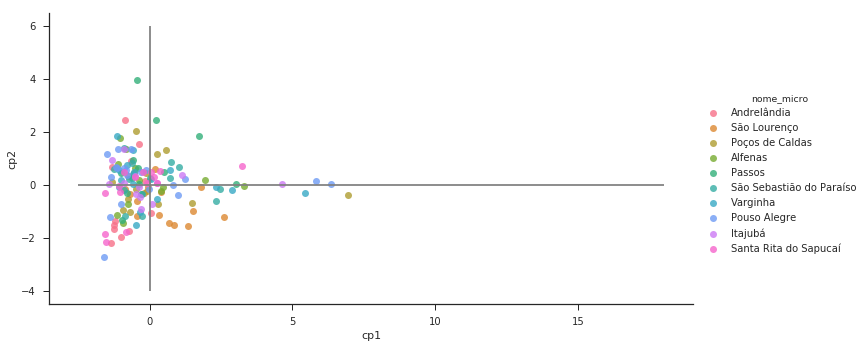

In [96]:
sns.lmplot('cp1', 'cp2', hue='nome_micro', fit_reg=False, data=resultado2, aspect=2)
plt.hlines(0, -2.5, 18, color='gray')
plt.vlines(0, -4, 6, color='gray');

In [97]:
import altair as alt
alt.renderers.enable('notebook');

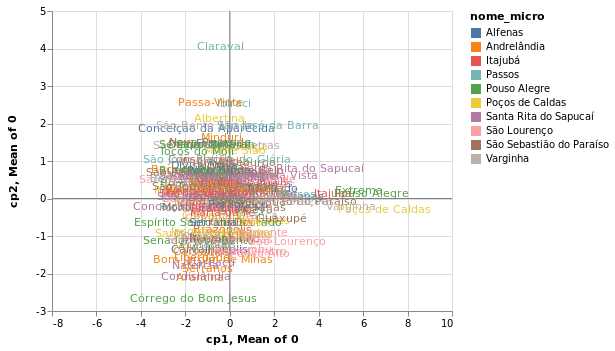

In [98]:
# gráfico
g = alt.Chart(resultado2).mark_text().encode(
    alt.X('cp1', scale=alt.Scale(domain=[-7, 10])),
    alt.Y('cp2', scale=alt.Scale(domain=[-3, 5])),
    text='nome_mun',
    color='nome_micro'
)
# eixo x = 0
bar = alt.Chart(resultado2).mark_rule(color='gray').encode(
    x='mean(0):Q')
# eixo y = 0
bar1 = alt.Chart(resultado2).mark_rule(color='gray').encode(
    y='mean(0):Q')


g + bar + bar1